### === Task ===

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

2. Plot training losses as number of iters increases.

3. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.


In [2]:
# feature scaling helps reaching convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

In [3]:
class LogisticRegression:
    
    def __init__(self, alpha=0.0001, max_iter=20000, loss_old=10000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.loss_old = loss_old
        
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        l_rate = 0.01
        self.losses = []
        self.iters = []
        
        #10% of data
        # minibatch
        batch_size = int(0.1 * X.shape[0])
        for i in range(self.max_iter):
            ix = np.random.randint(0, X.shape[0]) #<----with replacement
            batch_X = X[ix:ix+batch_size]
            batch_y = y[ix:ix+batch_size]
            loss, grad = self.gradient(batch_X, batch_y)
            if i % 500 == 0:
                print(f"Loss at iteration {i}", loss)
                self.losses.append(loss)
                self.iters.append(i)
            self.w = self.w - self.alpha * grad            

    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        # putting negative sign for negative log likelihood
        loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        grad = np.dot(X.T, error)
        return loss, grad

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def h_theta(self, X):
        return self.sigmoid(X @ self.w)

    def predict(self, X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat
    
    def plot(self):
        plt.plot(self.iters , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
        

Loss at iteration 0 24.26015131959808
Loss at iteration 500 15.770734336385047
Loss at iteration 1000 11.01516700693183
Loss at iteration 1500 10.016493806121556
Loss at iteration 2000 8.147759710791851
Loss at iteration 2500 8.771784523524994
Loss at iteration 3000 8.281532125800801
Loss at iteration 3500 7.279208062433803
Loss at iteration 4000 7.630943432572861
Loss at iteration 4500 6.542089695297688
Loss at iteration 5000 4.830070930683319
Loss at iteration 5500 4.884876512729243
Loss at iteration 6000 6.032797969769993
Loss at iteration 6500 4.574354214528965
Loss at iteration 7000 4.833576329682971
Loss at iteration 7500 5.88370964492721
Loss at iteration 8000 5.478287780843163
Loss at iteration 8500 6.281665492281201
Loss at iteration 9000 5.27896998522375
Loss at iteration 9500 2.391479091956878
Loss at iteration 10000 5.591610404905481
Loss at iteration 10500 6.139824166990125
Loss at iteration 11000 4.235801526579834
Loss at iteration 11500 0.7605128270277965
Loss at iterati

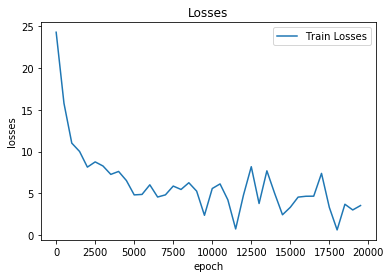

In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
model.plot()

In [5]:
class classification_reports():
    
    def __init__(self, actual, predicted):
        self.actual = actual
        self.predicted = predicted
        
        self.TP = sum((self.actual == 1) & (self.predicted == 1))
        self.TN = sum((self.actual == 0) & (self.predicted == 0))
        self.FN = sum((self.actual == 1) & (self.predicted == 0))
        self.FP = sum((self.actual == 0) & (self.predicted == 1))
        
    def accuracy(self):
        self.acc = 100 * (self.TP + self.TN)/ float( self.TP + self.TN + self.FN + self.FP)
        return self.acc
    
    def recall(self):
        self.recall = (100* self.TP)/ float(self.TP + self.FN)
        return self.recall
        
    def precision(self):
        self.precision = 100* (self.TP)/ float(self.TP + self.FP)
        return self.precision
        
    def f1(self):
        self.f1 = 2 * self.precision * self.recall / (self.precision + self.recall)
        return self.f1


In [6]:
# From scratch
report = classification_reports(y_test, yhat)
print(f"Accuracy: {report.accuracy()}")
print(f"Recall: {report.recall()}")
print(f"Precision: {report.precision()}")
print(f"F1: {report.f1()}")

# sklearn way
from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test, yhat))

Accuracy: 98.66666666666667
Recall: 98.59154929577464
Precision: 98.59154929577464
F1: 98.59154929577463
Report:               precision    recall  f1-score   support

          0       0.99      0.99      0.99        79
          1       0.99      0.99      0.99        71

avg / total       0.99      0.99      0.99       150

